In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [46]:
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/Aakankshasurvi/Aakanksha/refs/heads/main/train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [56]:
print(df.info())  
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
  Item_Identifier  Item_Weight Item_Fat_

In [57]:
print(df.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [58]:
print(df.isnull().sum())

#filling missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True) 

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

#converting categorical variables into numerical data by using one-hot encoding
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)

#selection of features
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)  
y = df['Item_Outlet_Sales']


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [59]:
from sklearn.model_selection import train_test_split

#train-test method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initializing the Random Forest model
rf_model = RandomForestRegressor()

#Training the model
rf_model.fit(X_train, y_train)

#Predictions of the model
y_pred = rf_model.predict(X_test)

# Evaluation of the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1200590.3262212663


In [19]:
from sklearn.linear_model import LinearRegression

# Initializing the Linear Regression model
lr_model = LinearRegression()

# Training the model
lr_model.fit(X_train, y_train)

#Predictions of the model
lr_y_pred = lr_model.predict(X_test)

# Evaluation of the model
lr_mse = mean_squared_error(y_test, lr_y_pred)
print(f'Linear Regression MSE: {lr_mse}')


Linear Regression MSE: 1143863.1251237614


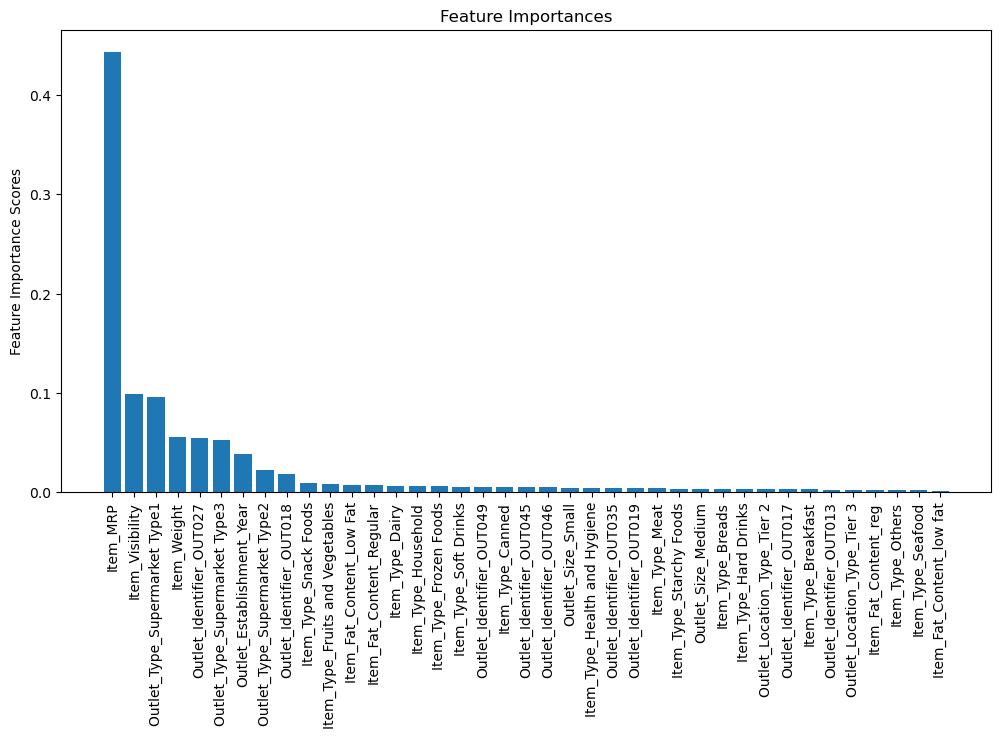

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances
imp = model.feature_importances_
indices = np.argsort(imp)[::-1]

# Plot feature importances
plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.ylabel('Feature Importance Scores')
plt.bar(range(X_train.shape[1]), imp[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


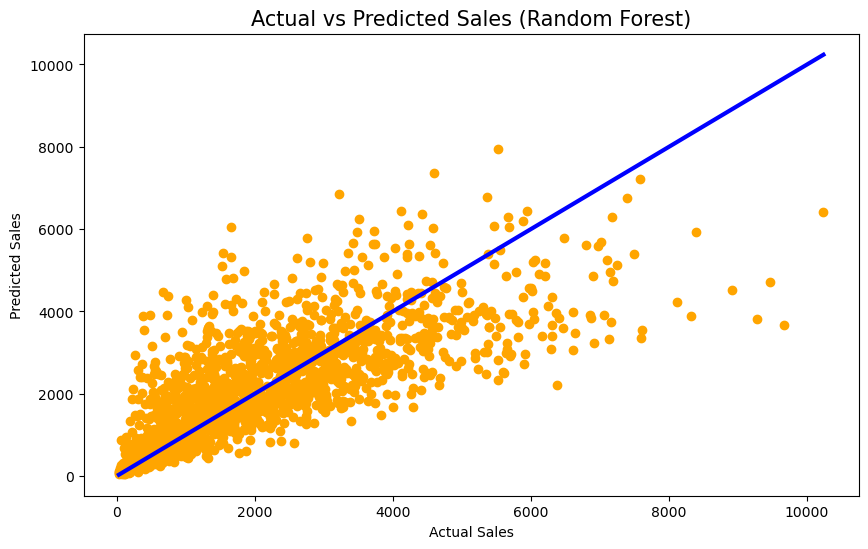

In [26]:


# Actual vs Predicted Sales for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', lw=3)
plt.title('Actual vs Predicted Sales (Random Forest)', fontsize=15)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


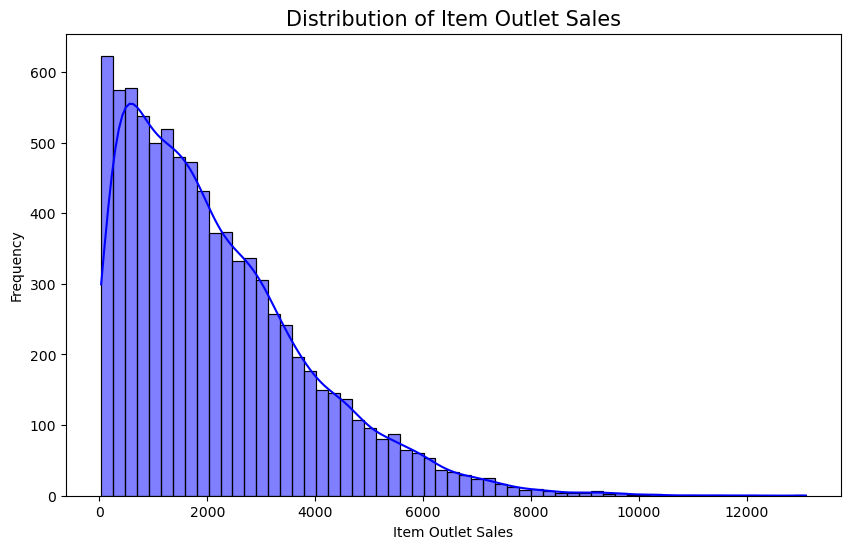

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable (Item_Outlet_Sales)
plt.figure(figsize=(10, 6))
sns.histplot(data['Item_Outlet_Sales'], kde=True, color='blue')
plt.title('Distribution of Item Outlet Sales', fontsize=15)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()


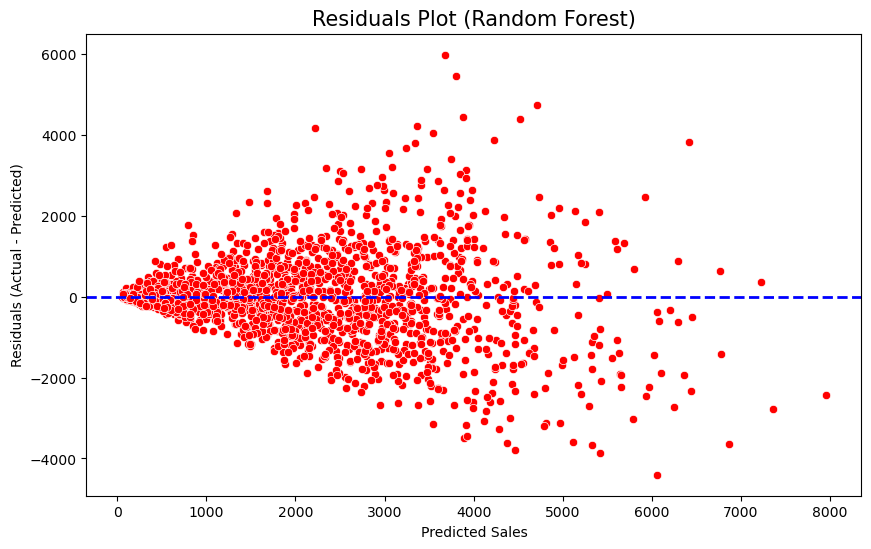

In [28]:
# Residuals plot for Random Forest
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='red')
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)
plt.title('Residuals Plot (Random Forest)', fontsize=15)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()
